# Example of classification algorithms

## Import dependencies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

## Load data

In [12]:
t = time()

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                 header=None)
elapsed = time() - t

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']


print("----- DataFrame loaded"
      "\nin {0:,.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

print('Class labels', np.unique(df['Class label']))
df.head()

----- DataFrame loaded
in 0.44 seconds (0.01 minutes)
with 178 rows
and 14 columns
-- Column names:
 Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Select target and features

In [16]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

## Perform the train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## Scale features

array: [0 1 2 3 4 5]
standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


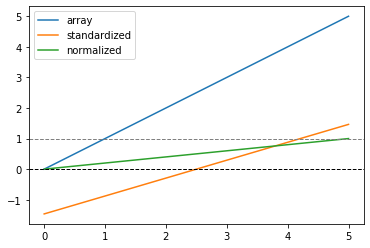

In [42]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('array:', ex)
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))
plt.plot(ex, label='array')
plt.plot((ex - ex.mean()) / ex.std(), label='standardized')
plt.plot((ex - ex.min()) / (ex.max() - ex.min()), label='normalized')
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.axhline(1, linestyle='--', color='gray', linewidth=1)
plt.legend(loc='best');

In [44]:
stdsc = StandardScaler()
print('standardized:', stdsc.fit_transform(ex.reshape(-1, 1)))

standardized: [[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]


In [37]:
mms = MinMaxScaler()
print('normalized:', mms.fit_transform(ex.reshape(-1, 1)))

normalized: [[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]


In [45]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [19]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [20]:
X_train

array([[1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
        1.285e+03],
       ...,
       [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
        4.150e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       [1.270e+01, 3.870e+00, 2.400e+00, ..., 1.190e+00, 3.130e+00,
        4.630e+02]])

In [46]:
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

In [21]:
X_train_norm

array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
        0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
        0.71825963],
       ...,
       [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
        0.09771755],
       [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
        0.43366619],
       [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
        0.13195435]])

## Train and test algorithms

### Logistic regression with L1 regularization

Applied to the standardized Wine data, the L1 regularized logistic regression would yield the following sparse solution:

In [49]:
lr = LogisticRegression(penalty='l1', C=1.0)
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regularization effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Both training and test accuracies (both 100 percent) indicate that our model does a perfect job on both datasets. When we access the intercept terms via the lr.intercept_ attribute, we can see that the array returns three values:

In [50]:
lr.intercept_

array([-1.26393146, -1.21626695, -2.36968518])

Since we fit the LogisticRegression object on a multiclass dataset, it uses the One-versus-Rest (OvR) approach by default, where the first intercept belongs to the model that fits class 1 versus class 2 and 3, the second value is the intercept of the model that fits class 2 versus class 1 and 3, and the third value is the intercept of the model that fits class 3 versus class 1 and 2:

In [51]:
lr.coef_

array([[ 1.2461828 ,  0.18069953,  0.74633989, -1.16396972,  0.        ,
         0.        ,  1.16010943,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55800805,  2.50903684],
       [-1.53620775, -0.38798712, -0.99504746,  0.3651725 , -0.05961572,
         0.        ,  0.66788366,  0.        ,  0.        , -1.93488441,
         1.23278581,  0.        , -2.23134885],
       [ 0.13627749,  0.16708815,  0.35669595,  0.        ,  0.        ,
         0.        , -2.44279804,  0.        ,  0.        ,  1.56520659,
        -0.82031344, -0.48803241,  0.        ]])

The weight array that we accessed via the `lr.coef_` attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 13 weights where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input:

$ z = w_1 x_1 + \dots + w_m x_m = \sum _{j=0}^m w_j x_j = \boldsymbol{w}^T \boldsymbol{x} $

In `scikit-learn`, $w_0$ corresponds to the `intercept_` and $w_j$ with $j>0$ correspond to the values in `coef_`.

As a result of L1 regularization, which serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset.

Strictly speaking, the weight vectors from the previous example are not necessarily sparse, though, because they contain more non-zero than zero entries. However, we could enforce sparsity (more zero entries) by further increasing the regularization strength—that is, choosing lower values for the C parameter.

In the next example, we will vary the regularization strength and plot the regularization path—the weight coefficients of the different features for different regularization strengths:

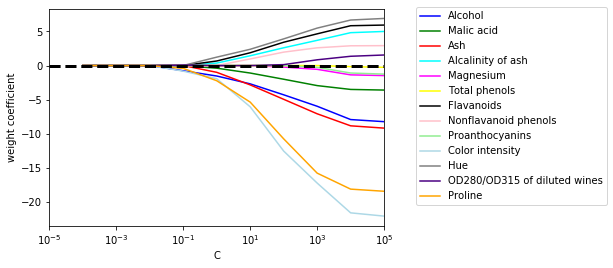

In [59]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver='liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

The resulting plot provides us with further insights into the behavior of L1 regularization. As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter (); C is the inverse of the regularization parameter $\lambda$.